<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 58.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 155.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 102.1 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-07 08:19:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  50.6MB/s    in 3.0s    

2025-05-07 08:19:42 (50.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

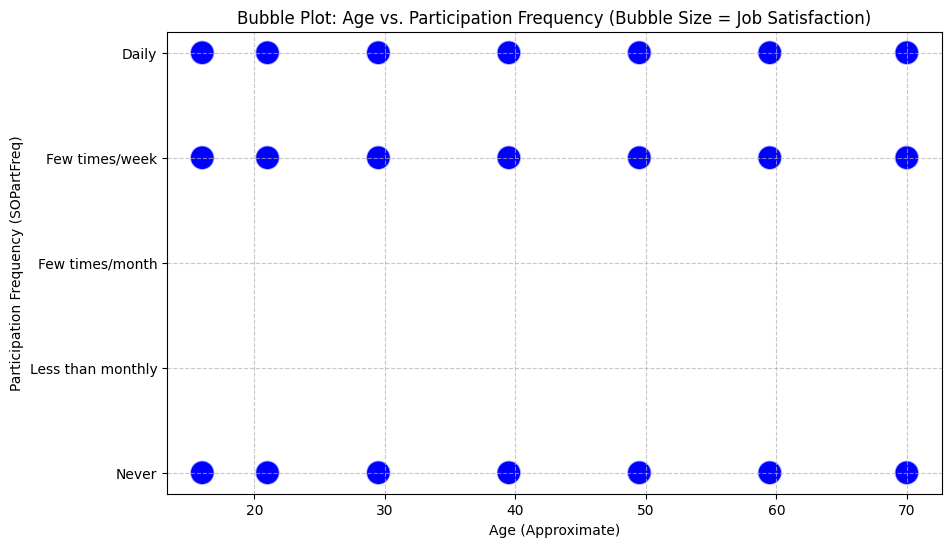

In [8]:


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values in relevant columns
print("\nUnique values in 'Age':", df['Age'].unique())
print("Unique values in 'SOPartFreq':", df['SOPartFreq'].unique())
print("Unique values in 'JobSat':", df['JobSat'].unique())
print("\nMissing values before imputation:")
print(df[['Age', 'SOPartFreq', 'JobSat']].isna().sum())

# Convert Age categories to numerical midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None  # Will be handled by imputation
}
df['Age_num'] = df['Age'].map(age_map)

# Impute missing values
# For Age_num (numerical): Use median
df['Age_num'] = df['Age_num'].fillna(df['Age_num'].median())

# For SOPartFreq (categorical): Use mode
df['SOPartFreq'] = df['SOPartFreq'].fillna(df['SOPartFreq'].mode()[0])

# For JobSat (categorical): Use mode
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['Age_num', 'SOPartFreq', 'JobSat']].isna().sum())

# Map SOPartFreq to numerical values
sopartfreq_map = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month': 1,
    'A few times per month': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4
}
df['SOPartFreq_num'] = df['SOPartFreq'].map(sopartfreq_map)

# Map JobSat to numerical values
jobsat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(jobsat_map)

# Debug: Check for any remaining missing values in mapped columns
print("\nMissing values in mapped columns:")
print(df[['Age_num', 'SOPartFreq_num', 'JobSat_num']].isna().sum())

# If mapping introduced NaNs (e.g., unexpected categories), fill with defaults
df['SOPartFreq_num'] = df['SOPartFreq_num'].fillna(0)  # Default to 'Never'
df['JobSat_num'] = df['JobSat_num'].fillna(3)  # Default to 'Neither satisfied nor dissatisfied'

# Debug: Check number of rows
print("\nNumber of rows in dataset:", len(df))

# Create the bubble plot
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size scaled by JobSat_num
plt.scatter(df['Age_num'], df['SOPartFreq_num'], 
            s=df['JobSat_num'] * 100,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='blue',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Age (Approximate)')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.title('Bubble Plot: Age vs. Participation Frequency (Bubble Size = Job Satisfaction)')

# Customize y-axis labels to show original SOPartFreq categories
plt.yticks(ticks=[0, 1, 2, 3, 4], 
           labels=['Never', 'Less than monthly', 'Few times/month', 'Few times/week', 'Daily'])

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

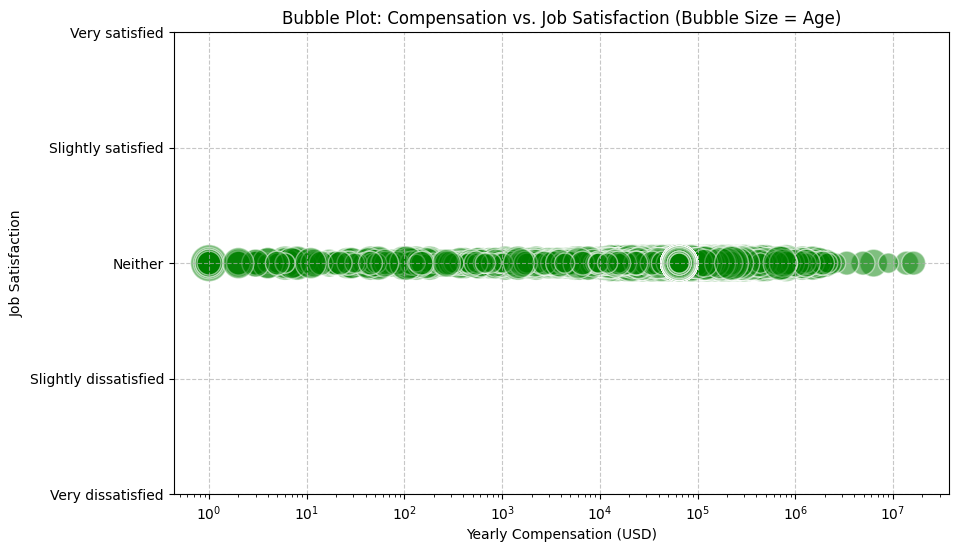

In [9]:


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'ConvertedCompYearly':", df['ConvertedCompYearly'].unique())
print("Unique values in 'JobSat':", df['JobSat'].unique())
print("Unique values in 'Age':", df['Age'].unique())
print("\nMissing values before imputation:")
print(df[['ConvertedCompYearly', 'JobSat', 'Age']].isna().sum())

# Convert Age categories to numerical midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_map)

# Impute missing values
# For ConvertedCompYearly (numerical): Use median
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# For JobSat (categorical): Use mode
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# For Age_num (numerical): Use median
df['Age_num'] = df['Age_num'].fillna(df['Age_num'].median())

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['ConvertedCompYearly', 'JobSat', 'Age_num']].isna().sum())

# Map JobSat to numerical values
jobsat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(jobsat_map)

# Debug: Check missing values in mapped columns
print("\nMissing values in mapped columns:")
print(df[['ConvertedCompYearly', 'JobSat_num', 'Age_num']].isna().sum())

# Handle missing values after mapping
df['JobSat_num'] = df['JobSat_num'].fillna(3)  # Default to 'Neither satisfied nor dissatisfied'

# Debug: Check number of rows
print("\nNumber of rows in dataset:", len(df))

# Create the bubble plot
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size scaled by Age_num
plt.scatter(df['ConvertedCompYearly'], df['JobSat_num'], 
            s=df['Age_num'] * 10,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='green',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xscale('log')  # Log scale for compensation to handle wide range

# Customize y-axis labels
plt.yticks(ticks=[1, 2, 3, 4, 5], 
           labels=['Very dissatisfied', 'Slightly dissatisfied', 'Neither', 'Slightly satisfied', 'Very satisfied'])

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

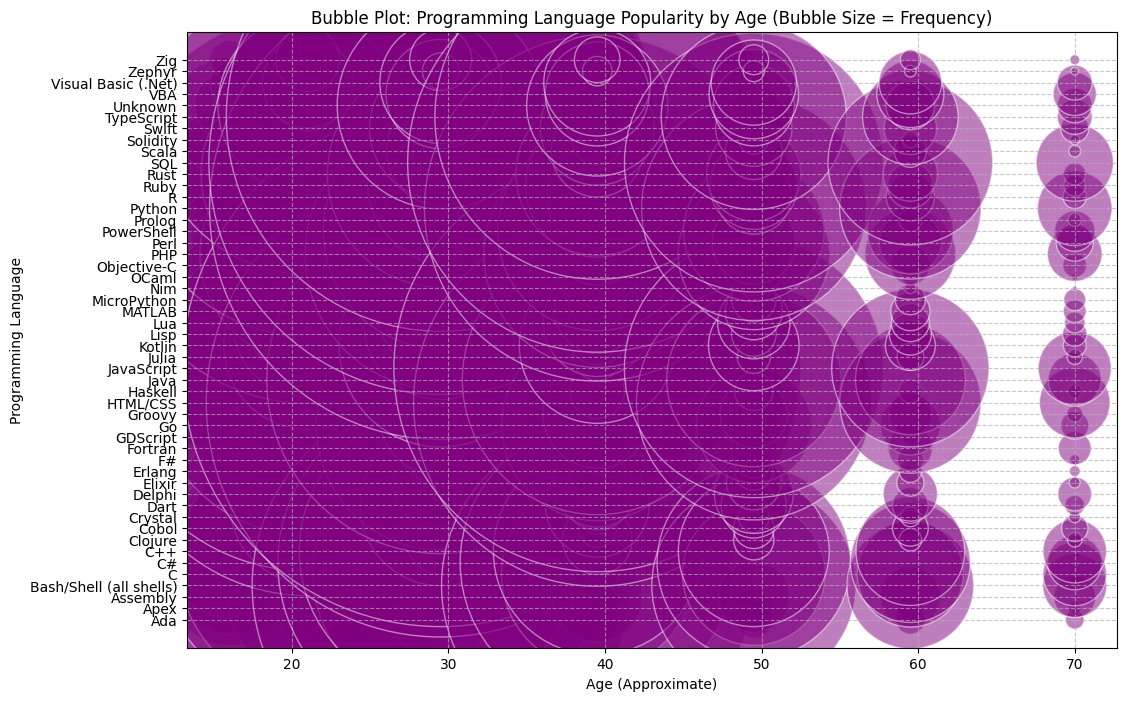

In [10]:
##Write your code here


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'Age':", df['Age'].unique())
print("Unique values in 'LanguageHaveWorkedWith':", df['LanguageHaveWorkedWith'].unique()[:10])  # Limit for brevity
print("\nMissing values before imputation:")
print(df[['Age', 'LanguageHaveWorkedWith']].isna().sum())

# Convert Age categories to numerical midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_map)

# Impute missing values
# For Age_num (numerical): Use median
df['Age_num'] = df['Age_num'].fillna(df['Age_num'].median())

# For LanguageHaveWorkedWith (categorical): Use placeholder 'Unknown'
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('Unknown')

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['Age_num', 'LanguageHaveWorkedWith']].isna().sum())

# Process LanguageHaveWorkedWith
# Split semicolon-separated languages and explode into individual rows
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

# Remove any whitespace and handle 'Unknown' or empty strings
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()
df_exploded = df_exploded[df_exploded['LanguageHaveWorkedWith'] != '']

# Aggregate frequency of each language by age group
language_freq = df_exploded.groupby(['Age_num', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Debug: Display the aggregated data
print("\nAggregated language frequency by age:")
print(language_freq.head(10))

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Get unique languages for y-axis
languages = language_freq['LanguageHaveWorkedWith'].unique()
language_indices = {lang: idx for idx, lang in enumerate(languages)}

# Map languages to indices for plotting
language_freq['Language_idx'] = language_freq['LanguageHaveWorkedWith'].map(language_indices)

# Scatter plot with bubble size scaled by frequency
plt.scatter(language_freq['Age_num'], language_freq['Language_idx'], 
            s=language_freq['Frequency'] * 10,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='purple',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Age (Approximate)')
plt.ylabel('Programming Language')
plt.title('Bubble Plot: Programming Language Popularity by Age (Bubble Size = Frequency)')

# Customize y-axis labels to show language names
plt.yticks(ticks=range(len(languages)), labels=languages)

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Debug: Check number of rows in aggregated data
print("\nNumber of rows in aggregated data:", len(language_freq))

# Show the plot
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

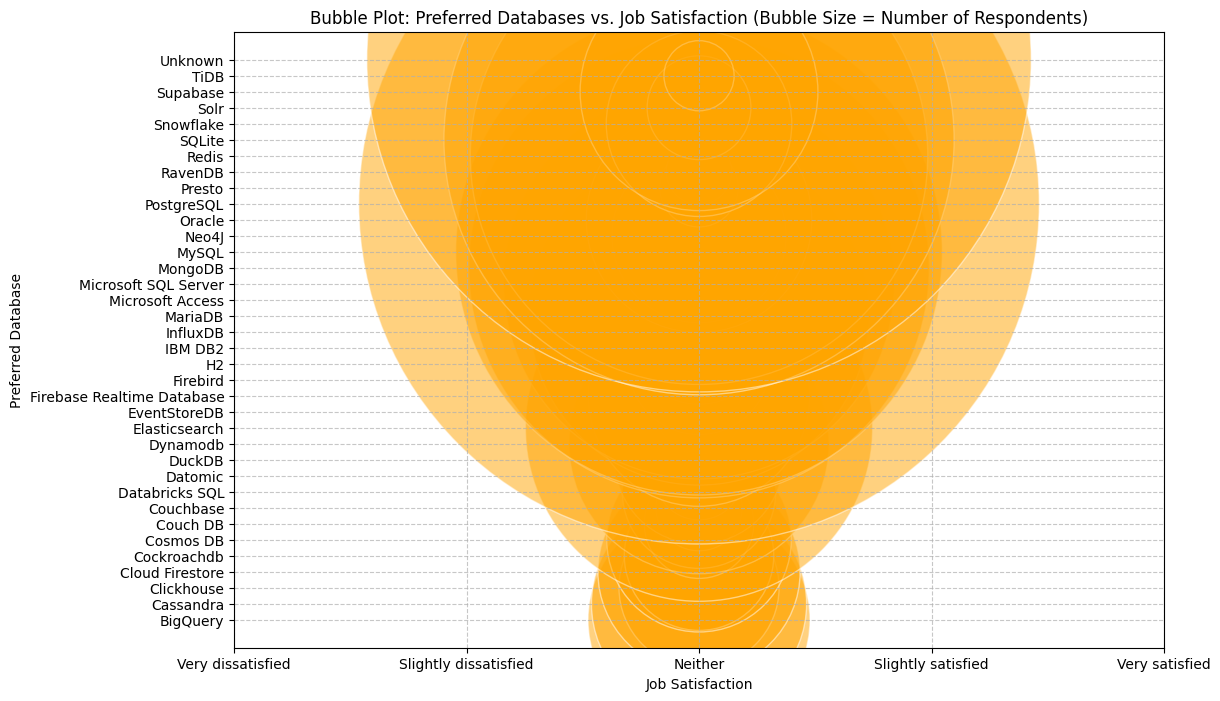

In [11]:


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'DatabaseWantToWorkWith':", df['DatabaseWantToWorkWith'].unique()[:10])  # Limit for brevity
print("Unique values in 'JobSat':", df['JobSat'].unique())
print("\nMissing values before imputation:")
print(df[['DatabaseWantToWorkWith', 'JobSat']].isna().sum())

# Impute missing values
# For DatabaseWantToWorkWith (categorical): Use placeholder 'Unknown'
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].fillna('Unknown')

# For JobSat (categorical): Use mode
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['DatabaseWantToWorkWith', 'JobSat']].isna().sum())

# Map JobSat to numerical values
jobsat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(jobsat_map)

# Handle missing values after mapping
df['JobSat_num'] = df['JobSat_num'].fillna(3)  # Default to 'Neither satisfied nor dissatisfied'

# Process DatabaseWantToWorkWith
# Split semicolon-separated databases and explode into individual rows
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')

# Remove any whitespace and handle 'Unknown' or empty strings
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()
df_exploded = df_exploded[df_exploded['DatabaseWantToWorkWith'] != '']

# Aggregate frequency of each database by JobSat
database_freq = df_exploded.groupby(['JobSat_num', 'DatabaseWantToWorkWith']).size().reset_index(name='Frequency')

# Debug: Display the aggregated data
print("\nAggregated database frequency by JobSat:")
print(database_freq.head(10))

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Get unique databases for y-axis
databases = database_freq['DatabaseWantToWorkWith'].unique()
database_indices = {db: idx for idx, db in enumerate(databases)}

# Map databases to indices for plotting
database_freq['Database_idx'] = database_freq['DatabaseWantToWorkWith'].map(database_indices)

# Scatter plot with bubble size scaled by frequency
plt.scatter(database_freq['JobSat_num'], database_freq['Database_idx'], 
            s=database_freq['Frequency'] * 10,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='orange',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Database')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction (Bubble Size = Number of Respondents)')

# Customize x-axis labels
plt.xticks(ticks=[1, 2, 3, 4, 5], 
           labels=['Very dissatisfied', 'Slightly dissatisfied', 'Neither', 'Slightly satisfied', 'Very satisfied'])

# Customize y-axis labels to show database names
plt.yticks(ticks=range(len(databases)), labels=databases)

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Debug: Check number of rows in aggregated data
print("\nNumber of rows in aggregated data:", len(database_freq))

# Show the plot
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

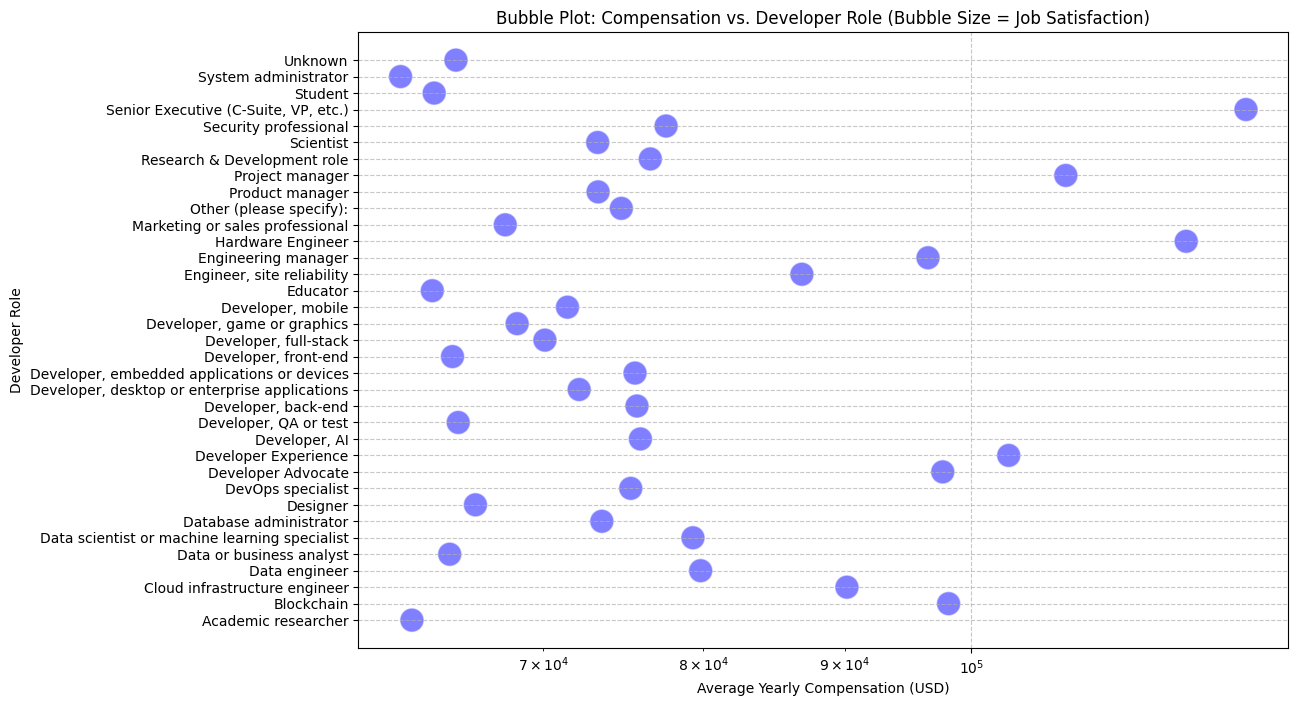

In [12]:

# Debug: Display column names and first few rows
print_IR="Column names: {}".format(df.columns.tolist())
print(print_IR)
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'ConvertedCompYearly':", df['ConvertedCompYearly'].unique()[:10])  # Limit for brevity
print("Unique values in 'DevType':", df['DevType'].unique()[:10])  # Limit for brevity
print("Unique values in 'JobSat':", df['JobSat'].unique())
print("\nMissing values before imputation:")
print(df[['ConvertedCompYearly', 'DevType', 'JobSat']].isna().sum())

# Impute missing values
# For ConvertedCompYearly (numerical): Use median
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# For DevType (categorical): Use placeholder 'Unknown'
df['DevType'] = df['DevType'].fillna('Unknown')

# For JobSat (categorical): Use mode
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['ConvertedCompYearly', 'DevType', 'JobSat']].isna().sum())

# Map JobSat to numerical values
jobsat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(jobsat_map)

# Handle missing values after mapping
df['JobSat_num'] = df['JobSat_num'].fillna(3)  # Default to 'Neither satisfied nor dissatisfied'

# Process DevType
# Split semicolon-separated roles and explode into individual rows
df['DevType'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType')

# Remove any whitespace and handle 'Unknown' or empty strings
df_exploded['DevType'] = df_exploded['DevType'].str.strip()
df_exploded = df_exploded[df_exploded['DevType'] != '']

# Aggregate average compensation and job satisfaction by DevType
devtype_agg = df_exploded.groupby('DevType').agg({
    'ConvertedCompYearly': 'mean',
    'JobSat_num': 'mean'
}).reset_index()

# Debug: Display the aggregated data
print("\nAggregated data by DevType (average compensation and job satisfaction):")
print(devtype_agg.head(10))

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Get unique DevTypes for y-axis
devtypes = devtype_agg['DevType'].unique()
devtype_indices = {dt: idx for idx, dt in enumerate(devtypes)}

# Map DevTypes to indices for plotting
devtype_agg['DevType_idx'] = devtype_agg['DevType'].map(devtype_indices)

# Scatter plot with bubble size scaled by JobSat_num
plt.scatter(devtype_agg['ConvertedCompYearly'], devtype_agg['DevType_idx'], 
            s=devtype_agg['JobSat_num'] * 100,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='blue',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.title('Bubble Plot: Compensation vs. Developer Role (Bubble Size = Job Satisfaction)')
plt.xscale('log')  # Log scale for compensation to handle wide range

# Customize y-axis labels to show DevType names
plt.yticks(ticks=range(len(devtypes)), labels=devtypes)

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Debug: Check number of rows in aggregated data
print("\nNumber of rows in aggregated data:", len(devtype_agg))

# Show the plot
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

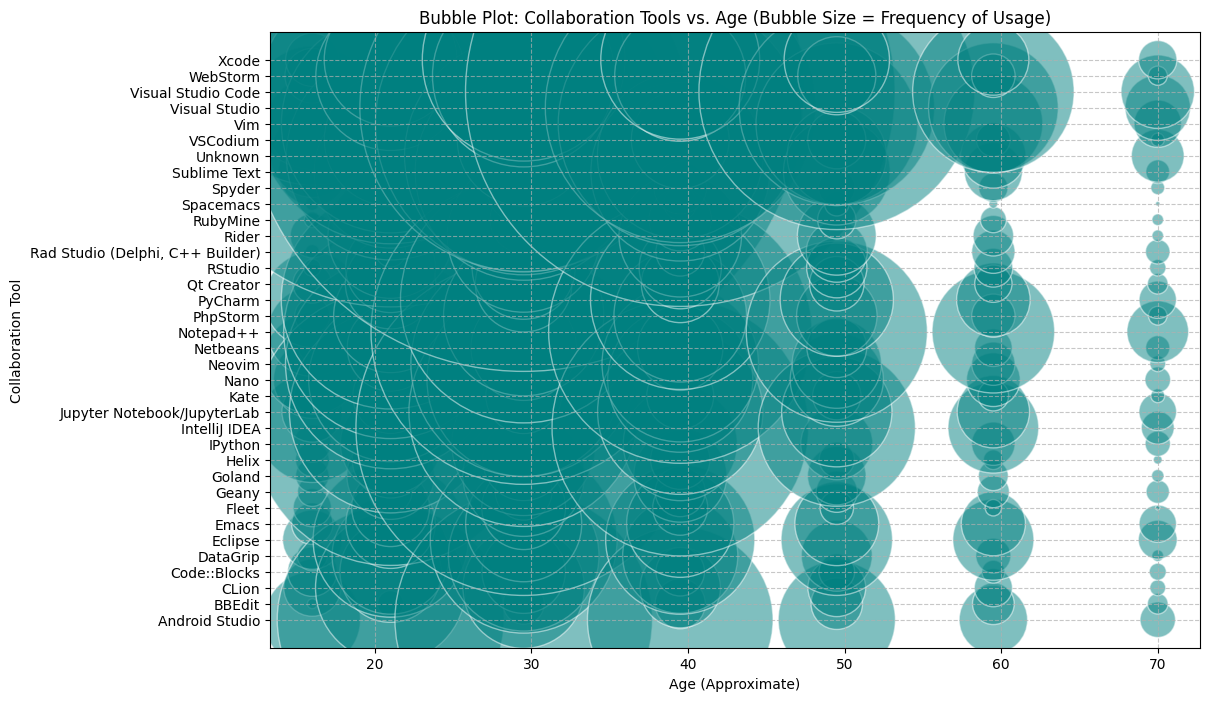

In [13]:


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'Age':", df['Age'].unique())
print("Unique values in 'NEWCollabToolsHaveWorkedWith':", df['NEWCollabToolsHaveWorkedWith'].unique()[:10])  # Limit for brevity
print("\nMissing values before imputation:")
print(df[['Age', 'NEWCollabToolsHaveWorkedWith']].isna().sum())

# Convert Age categories to numerical midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_map)

# Impute missing values
# For Age_num (numerical): Use median
df['Age_num'] = df['Age_num'].fillna(df['Age_num'].median())

# For NEWCollabToolsHaveWorkedWith (categorical): Use placeholder 'Unknown'
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].fillna('Unknown')

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['Age_num', 'NEWCollabToolsHaveWorkedWith']].isna().sum())

# Process NEWCollabToolsHaveWorkedWith
# Split semicolon-separated tools and explode into individual rows
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df.explode('NEWCollabToolsHaveWorkedWith')

# Remove any whitespace and handle 'Unknown' or empty strings
df_exploded['NEWCollabToolsHaveWorkedWith'] = df_exploded['NEWCollabToolsHaveWorkedWith'].str.strip()
df_exploded = df_exploded[df_exploded['NEWCollabToolsHaveWorkedWith'] != '']

# Aggregate frequency of each tool by age group
tool_freq = df_exploded.groupby(['Age_num', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Debug: Display the aggregated data
print("\nAggregated tool frequency by age:")
print(tool_freq.head(10))

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Get unique tools for y-axis
tools = tool_freq['NEWCollabToolsHaveWorkedWith'].unique()
tool_indices = {tool: idx for idx, tool in enumerate(tools)}

# Map tools to indices for plotting
tool_freq['Tool_idx'] = tool_freq['NEWCollabToolsHaveWorkedWith'].map(tool_indices)

# Scatter plot with bubble size scaled by frequency
plt.scatter(tool_freq['Age_num'], tool_freq['Tool_idx'], 
            s=tool_freq['Frequency'] * 10,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='teal',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Age (Approximate)')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools vs. Age (Bubble Size = Frequency of Usage)')

# Customize y-axis labels to show tool names
plt.yticks(ticks=range(len(tools)), labels=tools)

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Debug: Check number of rows in aggregated data
print("\nNumber of rows in aggregated data:", len(tool_freq))

# Show the plot
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

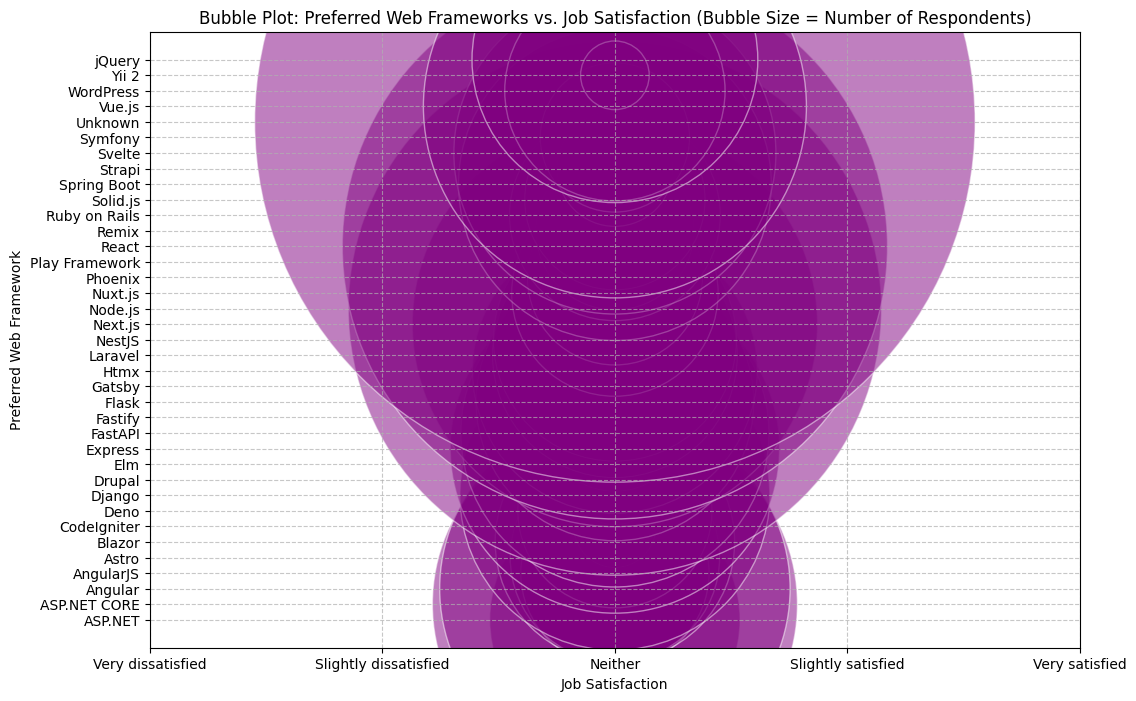

In [14]:


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'WebframeWantToWorkWith':", df['WebframeWantToWorkWith'].unique()[:10])  # Limit for brevity
print("Unique values in 'JobSat':", df['JobSat'].unique())
print("\nMissing values before imputation:")
print(df[['WebframeWantToWorkWith', 'JobSat']].isna().sum())

# Impute missing values
# For WebframeWantToWorkWith (categorical): Use placeholder 'Unknown'
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].fillna('Unknown')

# For JobSat (categorical): Use mode
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['WebframeWantToWorkWith', 'JobSat']].isna().sum())

# Map JobSat to numerical values
jobsat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(jobsat_map)

# Handle missing values after mapping
df['JobSat_num'] = df['JobSat_num'].fillna(3)  # Default to 'Neither satisfied nor dissatisfied'

# Process WebframeWantToWorkWith
# Split semicolon-separated frameworks and explode into individual rows
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].str.split(';')
df_exploded = df.explode('WebframeWantToWorkWith')

# Remove any whitespace and handle 'Unknown' or empty strings
df_exploded['WebframeWantToWorkWith'] = df_exploded['WebframeWantToWorkWith'].str.strip()
df_exploded = df_exploded[df_exploded['WebframeWantToWorkWith'] != '']

# Aggregate frequency of each framework by JobSat
framework_freq = df_exploded.groupby(['JobSat_num', 'WebframeWantToWorkWith']).size().reset_index(name='Frequency')

# Debug: Display the aggregated data
print("\nAggregated framework frequency by JobSat:")
print(framework_freq.head(10))

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Get unique frameworks for y-axis
frameworks = framework_freq['WebframeWantToWorkWith'].unique()
framework_indices = {fw: idx for idx, fw in enumerate(frameworks)}

# Map frameworks to indices for plotting
framework_freq['Framework_idx'] = framework_freq['WebframeWantToWorkWith'].map(framework_indices)

# Scatter plot with bubble size scaled by frequency
plt.scatter(framework_freq['JobSat_num'], framework_freq['Framework_idx'], 
            s=framework_freq['Frequency'] * 10,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='purple',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Web Framework')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction (Bubble Size = Number of Respondents)')

# Customize x-axis labels
plt.xticks(ticks=[1, 2, 3, 4, 5], 
           labels=['Very dissatisfied', 'Slightly dissatisfied', 'Neither', 'Slightly satisfied', 'Very satisfied'])

# Customize y-axis labels to show framework names
plt.yticks(ticks=range(len(frameworks)), labels=frameworks)

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Debug: Check number of rows in aggregated data
print("\nNumber of rows in aggregated data:", len(framework_freq))

# Show the plot
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

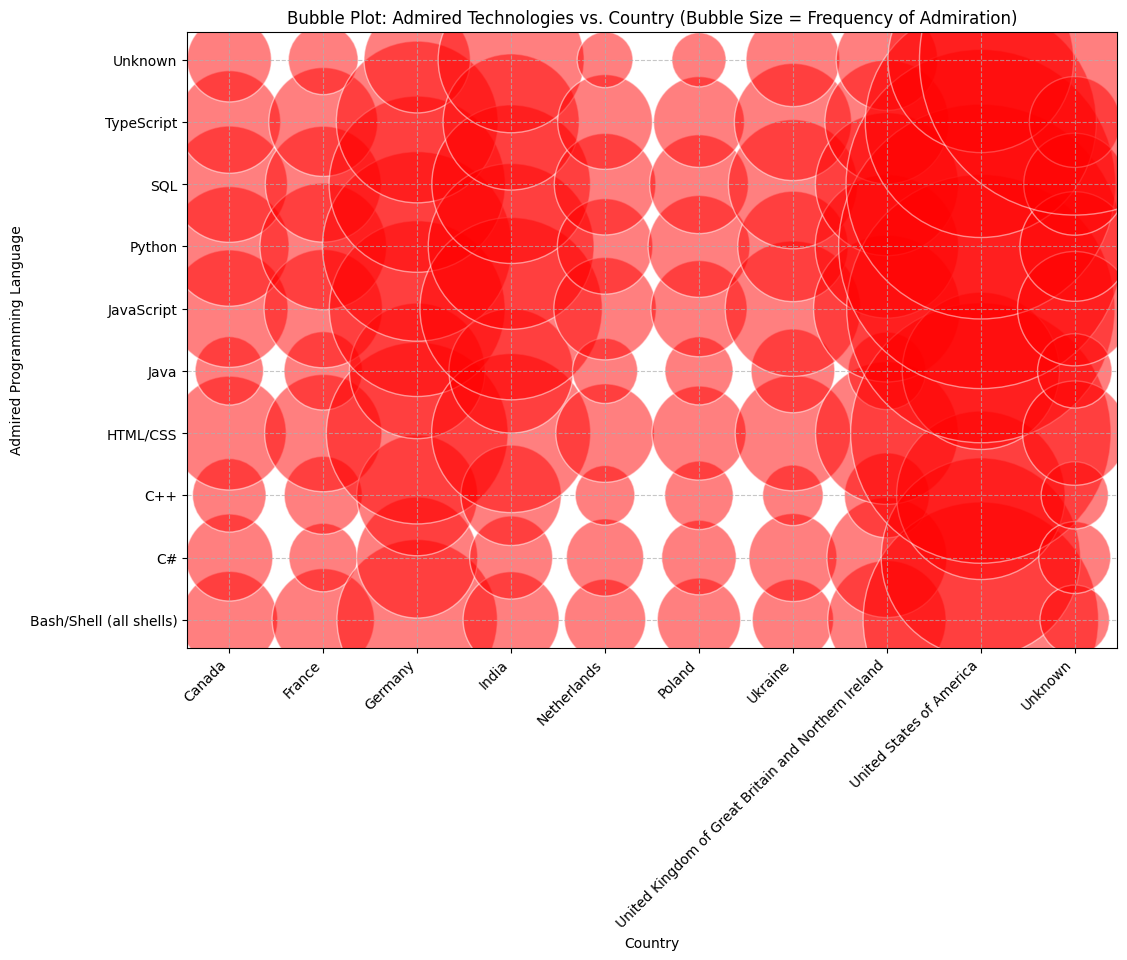

In [15]:


# Debug: Display column names and first few rows
print("Column names:", df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())

# Debug: Check unique values and missing values
print("\nUnique values in 'LanguageAdmired':", df['LanguageAdmired'].unique()[:10])  # Limit for brevity
print("Unique values in 'Country':", df['Country'].unique()[:10])  # Limit for brevity
print("\nMissing values before imputation:")
print(df[['LanguageAdmired', 'Country']].isna().sum())

# Impute missing values
# For LanguageAdmired (categorical): Use placeholder 'Unknown'
df['LanguageAdmired'] = df['LanguageAdmired'].fillna('Unknown')

# For Country (categorical): Use placeholder 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

# Debug: Check missing values after imputation
print("\nMissing values after imputation:")
print(df[['LanguageAdmired', 'Country']].isna().sum())

# Process LanguageAdmired
# Split semicolon-separated languages and explode into individual rows
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')
df_exploded = df.explode('LanguageAdmired')

# Remove any whitespace and handle 'Unknown' or empty strings
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()
df_exploded = df_exploded[df_exploded['LanguageAdmired'] != '']

# Aggregate frequency of each language by country
language_freq = df_exploded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')

# Limit to top 10 countries and languages by total frequency for readability
top_countries = language_freq.groupby('Country')['Frequency'].sum().nlargest(10).index
top_languages = language_freq.groupby('LanguageAdmired')['Frequency'].sum().nlargest(10).index
language_freq = language_freq[
    (language_freq['Country'].isin(top_countries)) & 
    (language_freq['LanguageAdmired'].isin(top_languages))
]

# Debug: Display the aggregated data
print("\nAggregated language frequency by country (top 10 countries and languages):")
print(language_freq.head(10))

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Get unique countries and languages for axes
countries = language_freq['Country'].unique()
languages = language_freq['LanguageAdmired'].unique()
country_indices = {country: idx for idx, country in enumerate(countries)}
language_indices = {lang: idx for idx, lang in enumerate(languages)}

# Map countries and languages to indices for plotting
language_freq['Country_idx'] = language_freq['Country'].map(country_indices)
language_freq['Language_idx'] = language_freq['LanguageAdmired'].map(language_indices)

# Scatter plot with bubble size scaled by frequency
plt.scatter(language_freq['Country_idx'], language_freq['Language_idx'], 
            s=language_freq['Frequency'] * 10,  # Scale bubble size
            alpha=0.5,  # Transparency for overlapping bubbles
            c='red',  # Bubble color
            edgecolors='w')  # White edges for clarity

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Admired Programming Language')
plt.title('Bubble Plot: Admired Technologies vs. Country (Bubble Size = Frequency of Admiration)')

# Customize x-axis labels to show country names
plt.xticks(ticks=range(len(countries)), labels=countries, rotation=45, ha='right')

# Customize y-axis labels to show language names
plt.yticks(ticks=range(len(languages)), labels=languages)

# Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Debug: Check number of rows in aggregated data
print("\nNumber of rows in aggregated data:", len(language_freq))

# Show the plot
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
